# 1.Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [5]:
iris_data = pd.read_csv('iris.csv')

# Numerical EDA

In [6]:
iris_info = iris_data.info()

iris_describe = iris_data.describe()

iris_head = iris_data.head()

print(iris_info)

print(iris_describe)

print(iris_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

In [7]:
# descriptive statistics for each of the different species. 
# check the mean Petal length across the 3 species
for t in iris_data['PetalLengthCm'].unique():
    print(t)
    print(iris_data[iris_data['PetalLengthCm'] == t].mean())

1.4
Id               21.833333
SepalLengthCm     4.916667
SepalWidthCm      3.333333
PetalLengthCm     1.400000
PetalWidthCm      0.216667
dtype: float64
1.3
Id               31.714286
SepalLengthCm     4.842857
SepalWidthCm      3.228571
PetalLengthCm     1.300000
PetalWidthCm      0.257143
dtype: float64
1.5
Id               24.714286
SepalLengthCm     5.128571
SepalWidthCm      3.535714
PetalLengthCm     1.500000
PetalWidthCm      0.221429
dtype: float64
1.7
Id               17.50
SepalLengthCm     5.40
SepalWidthCm      3.60
PetalLengthCm     1.70
PetalWidthCm      0.35
dtype: float64
1.6
Id               31.000000
SepalLengthCm     4.914286
SepalWidthCm      3.342857
PetalLengthCm     1.600000
PetalWidthCm      0.285714
dtype: float64
1.1
Id               14.0
SepalLengthCm     4.3
SepalWidthCm      3.0
PetalLengthCm     1.1
PetalWidthCm      0.1
dtype: float64
1.2
Id               25.5
SepalLengthCm     5.4
SepalWidthCm      3.6
PetalLengthCm     1.2
PetalWidthCm      0.2
dtype: 

C:\Users\my pc\AppData\Local\Temp\ipykernel_10516\2863573193.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris_data[iris_data['PetalLengthCm'] == t].mean())
C:\Users\my pc\AppData\Local\Temp\ipykernel_10516\2863573193.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris_data[iris_data['PetalLengthCm'] == t].mean())
C:\Users\my pc\AppData\Local\Temp\ipykernel_10516\2863573193.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. 

# Visual EDA

In [8]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Boxplot

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

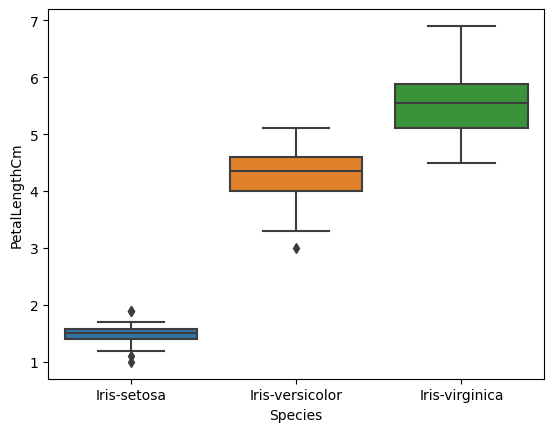

In [9]:
sns.boxplot(x='Species', 
                y='PetalLengthCm', 
                data=iris_data)

We can see that `sentosa` petal legth is sperated from other two. However petal length between `Versicolor` and `Virgina` is overlapped. So we might not be able to use `PetalLengthCm` feature alone to seperate between the species.

--------

## Violin Plot

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

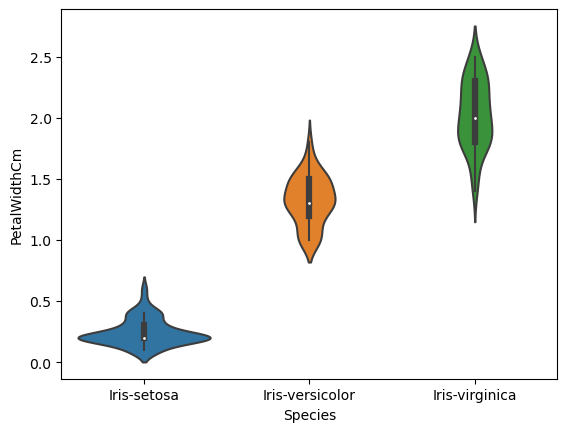

In [10]:
sns.violinplot(x = 'Species',
                      y = 'PetalWidthCm',
                      data = iris_data)

As we can in above chart, `PetalWidthCM` is around 0.25cm for most of `sentosa`, around 1.3 to 1.5 in `versicolor`. For `virginica` it doesn't really have prominant distribution except around 1.9. As mentioned earlier, there are a lot of overlapped between `versicolor` and`virginica` for PetalWidth again.

## Pair Plot
- a quick way to see how features are interacted with each other

As we found that to identify `sentosa`, we can purely use `PetalLeghtCM`. but to seperate between`versicolor` and `virginica`, we need more information.

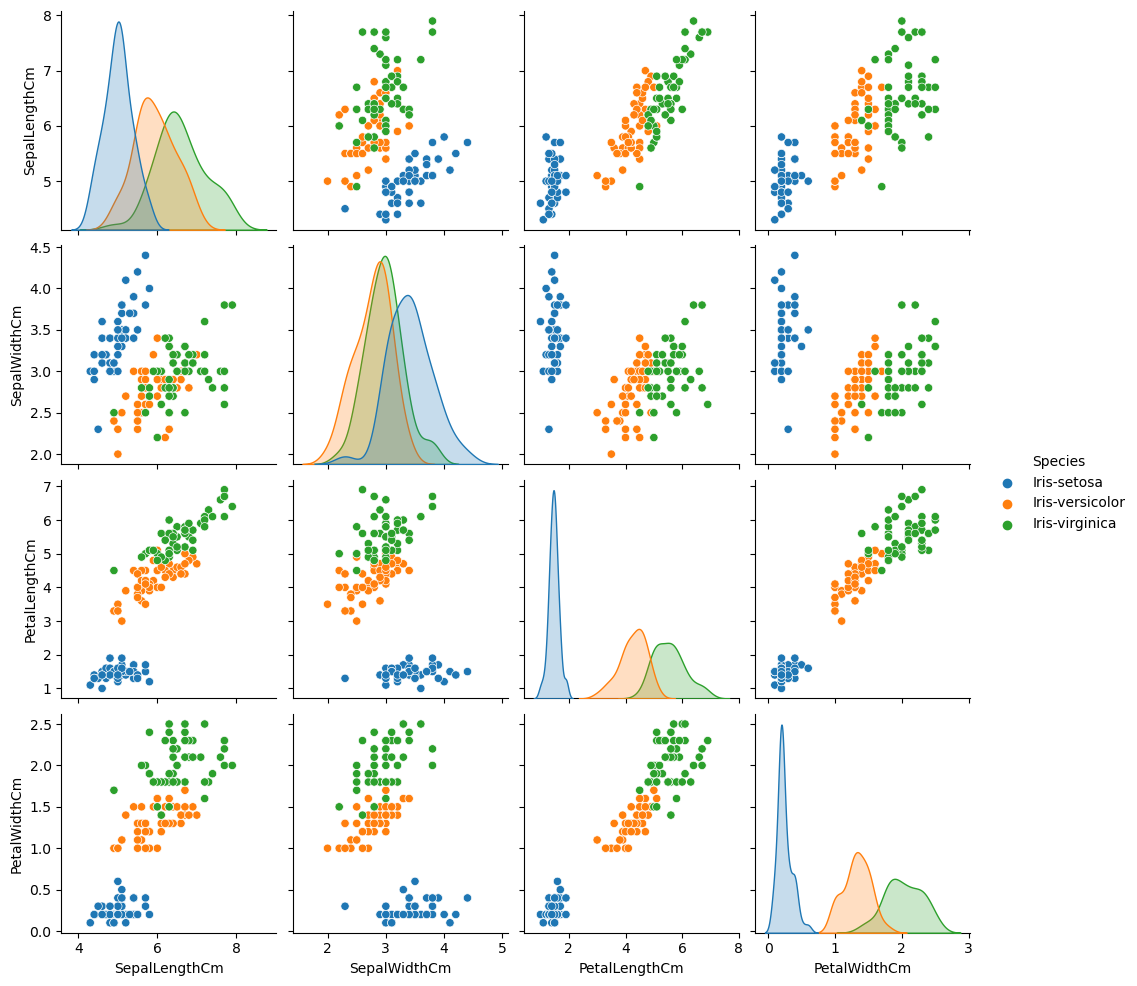

In [11]:
# remove id as it tells us nothing but is in the plot
sns.pairplot(data = iris_data.drop('Id',axis =1), 
             hue='Species')

Based on the above chart, we can see that `PetalLengthCm` and `PetalWidthCm` pairplot is the most clear way of seperation between different species.

# 2.Fitting the Model / Classifier

In [13]:
pip install mlxtend

In [14]:
import numpy as np 
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Features and Labels

In [16]:
# features 
X = iris_data[['PetalLengthCm','SepalLengthCm']]
X.head()

,PetalLengthCm,SepalLengthCm
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


In [17]:
# labels
flower_type = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3,
}

In [18]:
# map species to numeric values
y = iris_data['Species'].map(flower_type)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

# Fit the model (6 neighbors)

In [19]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

## Plot the decision boundary

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


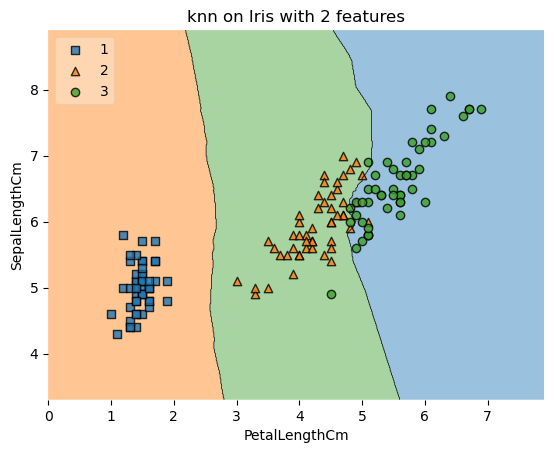

In [20]:
plot_decision_regions(np.array(X), np.array(y), clf=knn, legend=2)

plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.title('knn on Iris with 2 features')
plt.show()

## with 20 neighbours

In [21]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


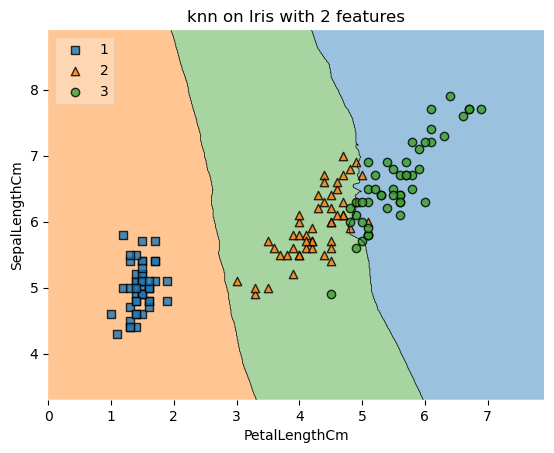

In [22]:
plot_decision_regions(np.array(X), np.array(y), clf=knn, legend=2)
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.title('knn on Iris with 2 features')
plt.show()

# 3.Measuring Performance

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Features and Labels

In [26]:
# features
features = iris_data[['PetalLengthCm','SepalLengthCm','PetalWidthCm','SepalWidthCm']]

In [27]:
features.head()

,PetalLengthCm,SepalLengthCm,PetalWidthCm,SepalWidthCm
0,1.4,5.1,0.2,3.5
1,1.4,4.9,0.2,3.0
2,1.3,4.7,0.2,3.2
3,1.5,4.6,0.2,3.1
4,1.4,5.0,0.2,3.6


In [28]:
# labels
flowers = {
    'Iris-setosa':1, 
    'Iris-versicolor':2, 
    'Iris-virginica':3
}

labels = iris_data['Species'].map(flowers)

In [29]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

# Create Train and Test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=64)

In [31]:
X_train.shape, y_train.shape

((30, 4), (30,))

# Fit the model

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Measuring Performance

In [33]:
# check with test dataset
predict = knn.predict(X_test)

In [34]:
# check the predicted results
print(accuracy_score(predict, y_test))
print(precision_score(predict, y_test, average='weighted'))
print(recall_score(predict, y_test, average='weighted'))

0.95
0.9531349206349208
0.95


In [35]:
# check the predicted results
print(accuracy_score(predict, y_test))
print(precision_score(predict, y_test, average=None))
print(recall_score(predict, y_test, average=None))

0.95
[1.         0.975      0.88095238]
[1.         0.88636364 0.97368421]
